# TG - Data processing - part 1

## 1. Import packages

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.io as scipy
import os
import math

## 2. Define names

<div class="alert alert-block alert-info">
<b>data_path:</b> path where data is stored
    
<b>subject_name:</b> list with all subjects who participated in the experiment

<b>level:</b> list with mental workload levels (Low or L, Medium or M, High or H, Rest or R)

<b>parameters_band:</b> list with ECG chest-band parameters

<b>parameters_eye:</b> list with eye-tracker parameters

<b>block:</b> list with block number (1 or 2)
</div>

In [2]:
data_path = "C:/Users/atmiy/OneDrive/Documents/TG/Data/"
subject_name = ["sujet2", "sujet4", "sujet6",
                "sujet7", "sujet8", "sujet9", 
                "sujet13", "sujet16", "sujet17", 
                "sujet20", "sujet21"]

level = ["L","M", "H", "R"]

parameters_band = ["HR", "HRV", "Posture", "BR"]

parameters_eye = ["RightEyePupilDiameter",
                  "LeftEyePupilDiameter",
                  "WeightedGazePointX",
                  "WeightedGazePointY"]

block = ["1", "2"]

## 3. Process data

In [3]:
def mat_to_data(data_path, subject_name, level, block, parameters):
    
    subj_frames = {}

    for i,sub in enumerate(subject_name):
    
        subj_frames[sub] = None
    
        for j, lvl in enumerate(level):
            for k, blk in enumerate(block):
                for l, par in enumerate(parameters):
                    if l == 0:
                        data = scipy.loadmat(data_path + sub + "/" + 
                                             sub + "_" + par + "_" + lvl 
                                             + blk + ".mat")
                        data.pop('__header__', None)
                        data.pop('__version__', None)
                        data.pop('__globals__', None)
                
                        data['Signal'] = data['Signal'].reshape(
                            data['Signal'].shape[1], 1)
                        data['Time'] = data['Time'].reshape(
                            data['Time'].shape[1], 1)
                
                        df = pd.DataFrame(np.hstack((data['Time'], data['Signal'])))
                        df = df.rename(columns={0: "Time", 1: par})

                    else:
                        data = scipy.loadmat(data_path + sub + "/" + 
                                             sub + "_" + par + "_" + 
                                             lvl + blk + ".mat")
                        data.pop('__header__', None)
                        data.pop('__version__', None)
                        data.pop('__globals__', None)
                    
                        data['Signal'] = data['Signal'].reshape(
                            data['Signal'].shape[1], 1)
                        data['Time'] = data['Time'].reshape(
                            data['Time'].shape[1], 1)
                    
                        aux = pd.DataFrame(np.hstack((data['Time'], data['Signal'])))
                        aux = aux.rename(columns={0: "Time", 1: par})
                    
                        df = pd.merge(df, aux, on='Time')
            
                df['Block'] = blk
                df['Level'] = lvl
            
                subj_frames[sub] = pd.concat([subj_frames[sub],df])
    
        subj_frames[sub] = subj_frames[sub].sort_values(
            by = "Time", ascending = True)
        subj_frames[sub].index = range(len(subj_frames[sub]))
        
    return subj_frames

In [4]:
def save_all_csv(frame, subject_name, cap):
    for sub in subject_name:
        frame[sub].to_csv('C:/Users/atmiy/OneDrive/Documents/TG/Code/' + sub + '_' + cap + '.csv', index = False)

### 3.1 Process chest-band data from .mat

In [5]:
subj_frames_band = mat_to_data(data_path, subject_name, level, block, parameters_band)

In [6]:
save_all_csv(subj_frames_band, subject_name, 'band')

In [7]:
print(len(subj_frames_band["sujet2"]))
subj_frames_band["sujet2"].head()

1680


,Time,HR,HRV,Posture,BR,Block,Level
0,35731.422,75.0,73.0,-11.0,16.3,1,R
1,35732.422,77.0,72.0,-11.0,16.3,1,R
2,35733.422,74.0,72.0,-11.0,16.1,1,R
3,35734.422,75.0,71.0,-11.0,16.1,1,R
4,35735.422,72.0,71.0,-11.0,16.3,1,R


In [8]:
subj_frames_band["sujet2"].describe()

,Time,HR,HRV,Posture,BR
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,37123.207714,83.276786,64.099405,-10.385119,22.560833
std,752.991209,6.857969,11.353395,1.328621,3.194542
min,35731.422000,63.000000,33.000000,-15.000000,10.500000
25%,36469.172000,79.000000,57.000000,-11.000000,21.800000
50%,37202.922000,84.000000,67.000000,-11.000000,23.200000
75%,37794.672000,88.000000,72.000000,-10.000000,24.500000
max,38291.422000,99.000000,83.000000,11.000000,28.900000


#### 3.1 Plot dataframe

In [9]:
def plot_interval_block(frame, par, level, block, color):
    aux_frame = frame[frame["Level"] == level]
    aux_frame = aux_frame[aux_frame['Block'] == block]
    aux_frame.index = range(len(aux_frame))
    
    x_min = aux_frame['Time'][0]
    x_max = aux_frame['Time'][len(aux_frame) - 1]
    
    bottom, top = plt.ylim()
    scl = abs(top - bottom)
    
    plt.axvspan(x_min, x_max, alpha=0.2, color=color)
#     plt.text((x_min + x_max)/2, bottom + scl/20, level + block)
    plt.text((x_min + x_max)/2, top - scl/20, level + block)

In [10]:
def plot_curve(frame, subj, x, y, size):
    plt.figure(figsize=size)
    plt.plot(frame[x], each[y])
    plt.title(subj + ": " + y)
    plt.xlabel(x)
    plt.ylabel(par)

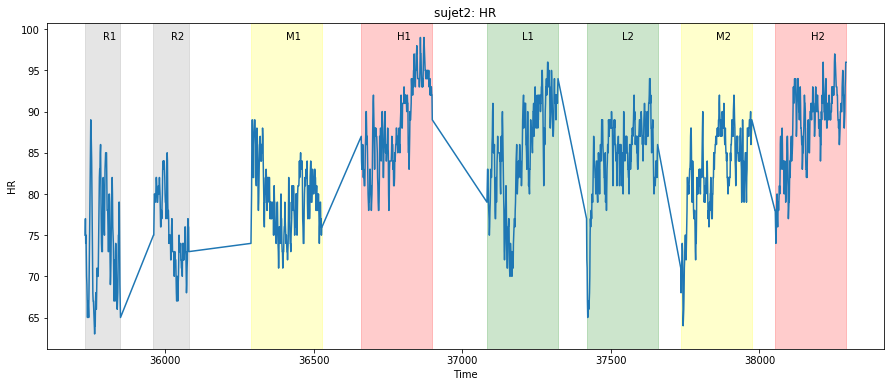

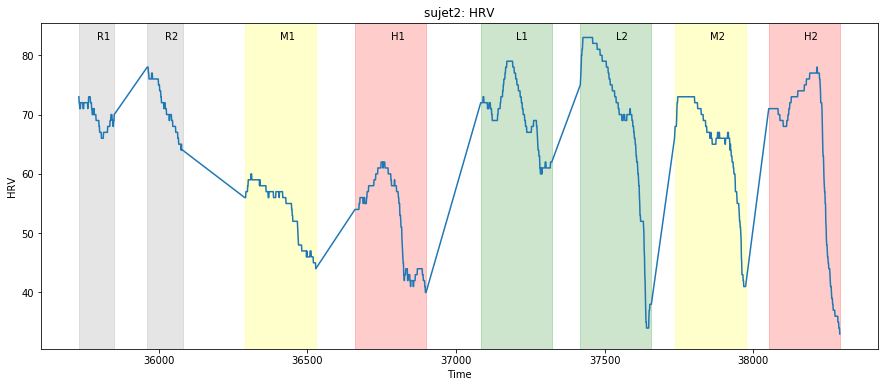

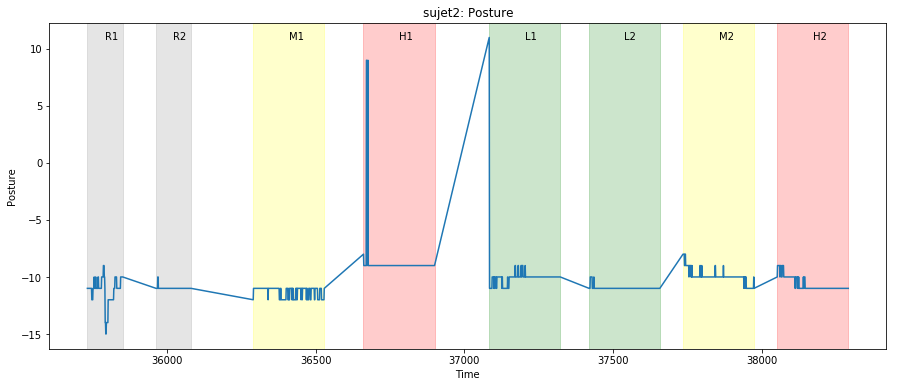

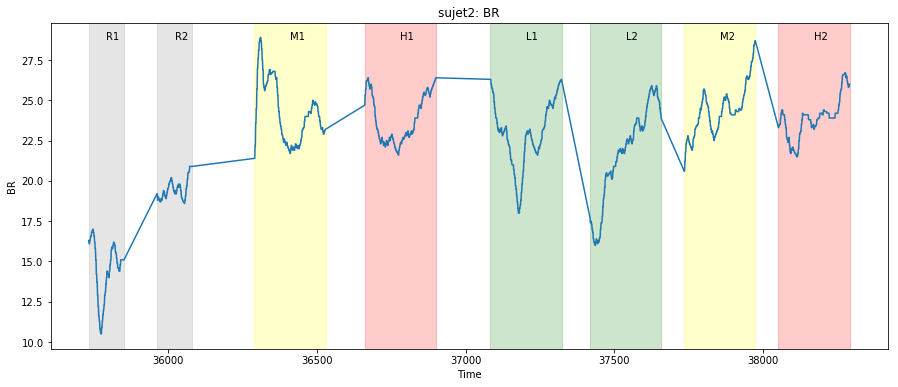

In [16]:
subj = "sujet2"

each = subj_frames_band[subj]
for par in parameters_band:
    
    plot_curve(each, subj, 'Time', par, (15,6))

    for lvl in level:
        for blk in block:
            if lvl == 'R':
                plot_interval_block(each, par, lvl, blk, 'grey')
            if lvl == 'L':
                plot_interval_block(each, par, lvl, blk, 'g')
            if lvl == 'M':
                plot_interval_block(each, par, lvl, blk, 'yellow')
            if lvl == 'H':
                plot_interval_block(each, par, lvl, blk, 'red')

    plt.show()

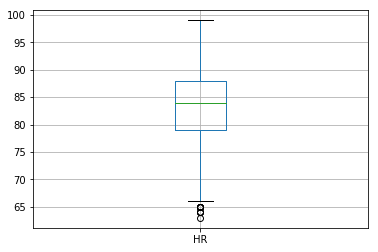

In [17]:
subj_frames_band['sujet2'].boxplot(column=['HR'])

### 4. Process eye-tracker data from .mat

In [11]:
subj_frames_eye = mat_to_data(data_path, subject_name, level, block, parameters_eye)

In [12]:
print(len(subj_frames_eye["sujet2"]))
subj_frames_eye["sujet2"].head()

72255


,Time,RightEyePupilDiameter,LeftEyePupilDiameter,WeightedGazePointX,WeightedGazePointY,Block,Level
0,35731.234,-1.0,4.0,0.0,0.0,1,R
1,35731.408,-1.0,4.0,0.0,0.0,1,R
2,35731.563,-1.0,4.0,0.0,0.0,1,R
3,35731.722,-1.0,4.0,0.0,0.0,1,R
4,35731.880,-1.0,4.0,0.0,0.0,1,R


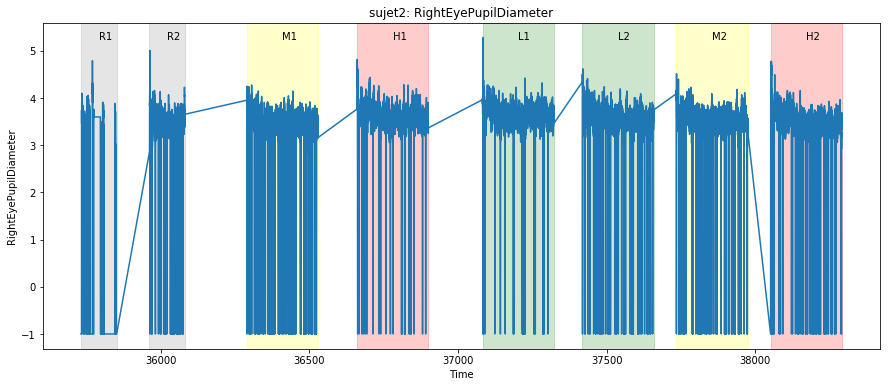

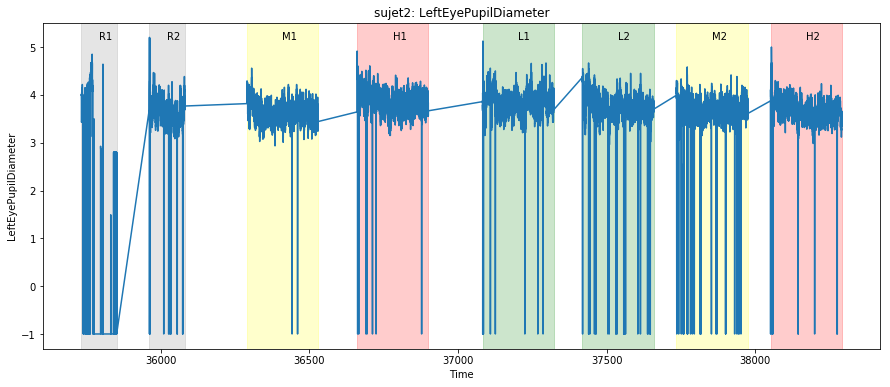

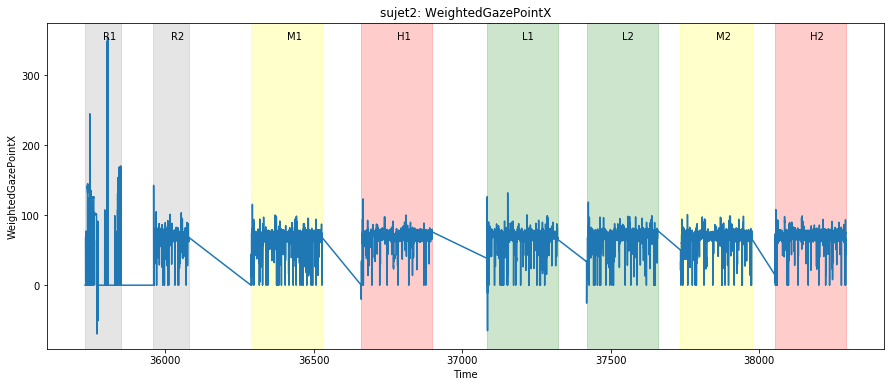

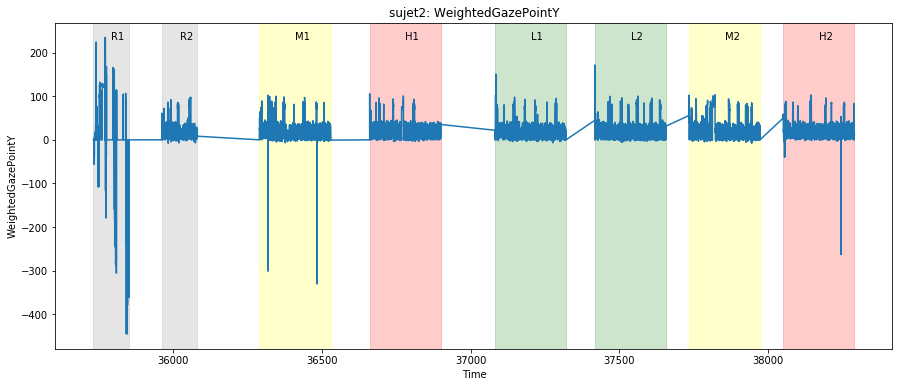

In [13]:
subj = "sujet2"

each = subj_frames_eye[subj]
for par in parameters_eye:
    
    plot_curve(each, subj, 'Time', par, (15,6))

    for lvl in level:
        for blk in block:
            if lvl == 'R':
                plot_interval_block(each, par, lvl, blk, 'grey')
            if lvl == 'L':
                plot_interval_block(each, par, lvl, blk, 'g')
            if lvl == 'M':
                plot_interval_block(each, par, lvl, blk, 'yellow')
            if lvl == 'H':
                plot_interval_block(each, par, lvl, blk, 'red')

    plt.show()

In [22]:
save_all_csv(subj_frames_eye, subject_name, 'eye_noprop')

In [23]:
l1 = {}
l2 = {}
for sub in subject_name:
    for lvl in level:
        for blk in block:
            f = subj_frames_eye[sub][subj_frames_eye[sub]['Level'] == lvl]
            l1[sub+lvl+blk] = f[f['Block'] == blk]['RightEyePupilDiameter'].mean()
            l2[sub+lvl+blk] = f[f['Block'] == blk]['LeftEyePupilDiameter'].mean()
            
for sub in subject_name:
    for i in range(len(subj_frames_eye[sub])):
        if subj_frames_eye[sub]['RightEyePupilDiameter'][i] <= 0:
            subj_frames_eye[sub]['RightEyePupilDiameter'][i] = l1[sub+
                                                                 subj_frames_eye[sub]['Level'][i]+
                                                                 subj_frames_eye[sub]['Block'][i]]
        if subj_frames_eye[sub]['LeftEyePupilDiameter'][i] <= 0:
            subj_frames_eye[sub]['LeftEyePupilDiameter'][i] = l2[sub+
                                                                 subj_frames_eye[sub]['Level'][i]+
                                                                 subj_frames_eye[sub]['Block'][i]]

C:\Users\atmiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\atmiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
save_all_csv(subj_frames_eye, subject_name, 'eye_pupil-prop')

In [29]:
print(len(subj_frames_eye["sujet2"]))
subj_frames_eye["sujet2"]

72255


,Time,RightEyePupilDiameter,LeftEyePupilDiameter,WeightedGazePointX,WeightedGazePointY,Block,Level
0,35731.234,0.947604,4.000000,0.000000,0.000000,1,R
1,35731.408,0.947604,4.000000,0.000000,0.000000,1,R
2,35731.563,0.947604,4.000000,0.000000,0.000000,1,R
3,35731.722,0.947604,4.000000,0.000000,0.000000,1,R
4,35731.880,0.947604,4.000000,0.000000,0.000000,1,R
5,35732.043,0.947604,4.000000,0.000000,0.000000,1,R
6,35732.212,0.947604,4.000000,0.000000,0.000000,1,R
7,35732.378,0.947604,4.000000,0.000000,0.000000,1,R
8,35732.494,0.947604,4.000000,0.000000,0.000000,1,R
9,35732.594,0.947604,4.000000,0.000000,0.000000,1,R


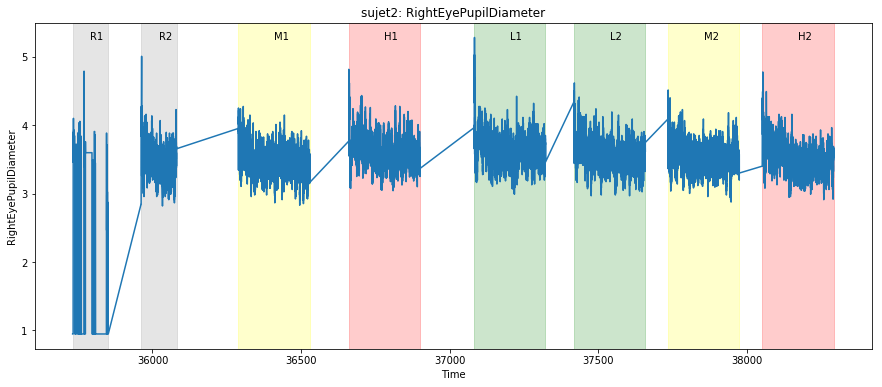

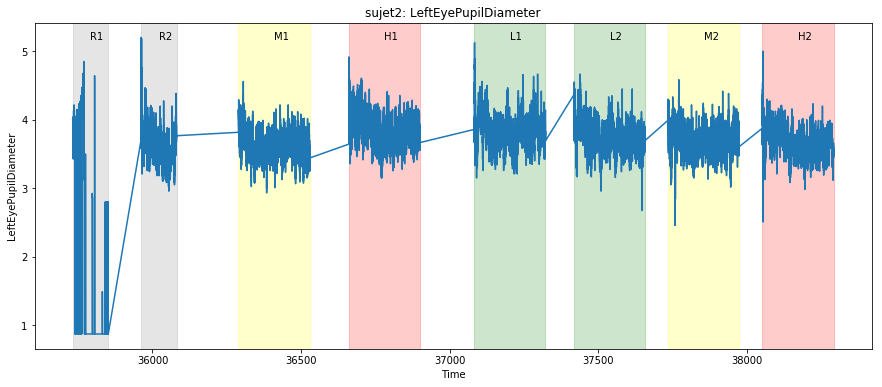

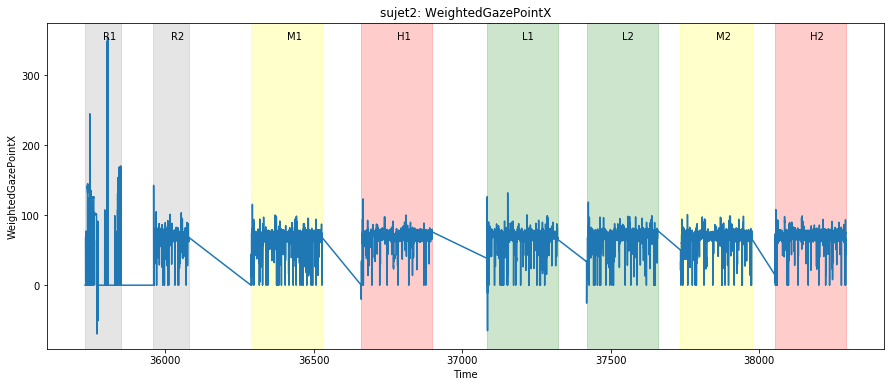

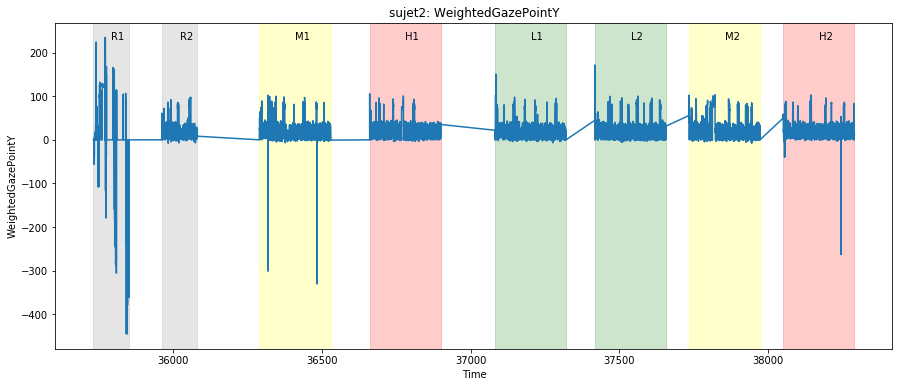

In [25]:
subj = "sujet2"

each = subj_frames_eye[subj]
for par in parameters_eye:
    
    plot_curve(each, subj, 'Time', par, (15,6))

    for lvl in level:
        for blk in block:
            if lvl == 'R':
                plot_interval_block(each, par, lvl, blk, 'grey')
            if lvl == 'L':
                plot_interval_block(each, par, lvl, blk, 'g')
            if lvl == 'M':
                plot_interval_block(each, par, lvl, blk, 'yellow')
            if lvl == 'H':
                plot_interval_block(each, par, lvl, blk, 'red')

    plt.show()

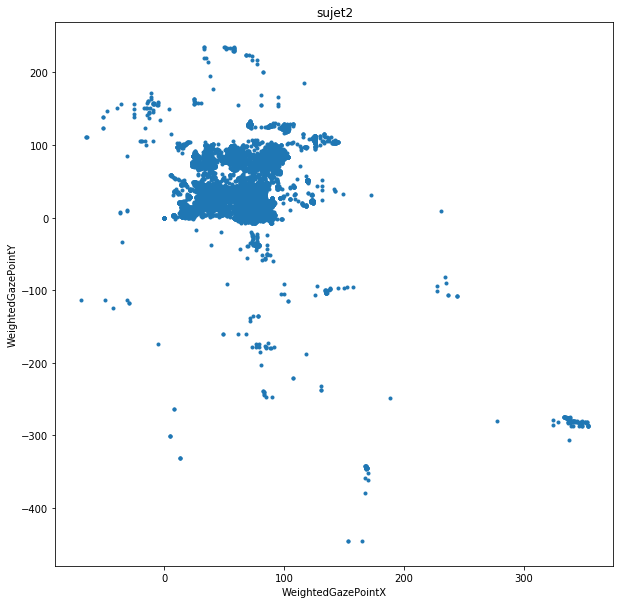

In [27]:
each1 = subj_frames_eye["sujet2"]

plt.figure(figsize=(10,10))
plt.plot(each1["WeightedGazePointX"], each1["WeightedGazePointY"], '.')
plt.title("sujet2")
plt.xlabel("WeightedGazePointX")
plt.ylabel("WeightedGazePointY")

plt.show()

In [ ]:
subj_frames_eye

aux_time = []
aux_par = []
dicti = {}
index = 0

# df['Time'][0:2].mean()
for sub in subject_name:
    frame = subj_frames_eye[sub]
    for par in parameters_eye:
        for i in range(len(frame)):
            if (frame['Time'][i] - frame['Time'][index] >= 1 - 0.013) or (i == len(frame) - 1):
                aux_time.append(frame['Time'][index:i].mean())
                aux_par.append(frame[par][index:i].mean())
                index = i

dicti['Time'] = lista1
dicti[par] = lista2
dicti_frame = pd.DataFrame(dicti)
dicti_frame

In [ ]:
listona = []
ei = subj_frames_eye['sujet2'][0:3][["WeightedGazePointX", "WeightedGazePointX"]].mean()
ei2 = subj_frames_eye['sujet2'][4:6][["WeightedGazePointX", "WeightedGazePointX"]].mean()
listona.append(ei)
listona.append(ei2)
listona

In [ ]:
# par = 'RightEyePupilDiameter'
par = "WeightedGazePointX"

data = scipy.loadmat(data_path + "sujet2" + "/" + "sujet2" + "_" + par + "_" + "L" + "1" + ".mat")
data.pop('__header__', None)
data.pop('__version__', None)
data.pop('__globals__', None)
                
data['Signal'] = data['Signal'].reshape(data['Signal'].shape[1], 1)
data['Time'] = data['Time'].reshape(data['Time'].shape[1], 1)
                
df = pd.DataFrame(np.hstack((data['Time'], data['Signal'])))
df = df.rename(columns={0: "Time", 1: par})


In [ ]:
len(df)

In [ ]:
print(df['Time'][1] - df['Time'][0])
print(df['Time'][2] - df['Time'][1])
print(df['Time'][3] - df['Time'][2])
print(df['Time'][4] - df['Time'][3])

In [ ]:
### lista1 = []
lista1 = []
lista2 = []
dicti = {}
flag = df['Time'][0]
index = 0

# df['Time'][0:2].mean()

for i in range(len(df)):
    if (df['Time'][i] - df['Time'][index] >= 1 - 0.013) or (i == len(df) - 1):
        lista1.append(df['Time'][index:i].mean())
        lista2.append(df[par][index:i].mean())
        index = i

dicti['Time'] = lista1
dicti[par] = lista2
dicti_frame = pd.DataFrame(dicti)
dicti_frame